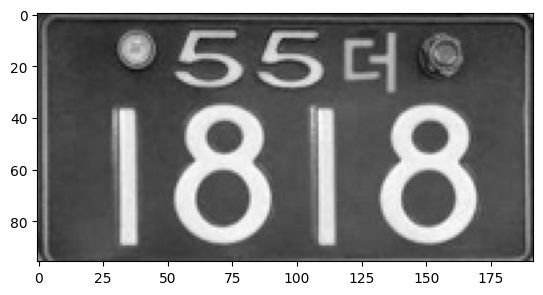

In [4]:
import os, random, glob, sys, time

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_path = glob.glob('data/*')
# shuffle the list
random.shuffle(img_path)
im = Image.open(img_path[0]).convert('L').resize((192, 96))
im = np.array(im)


# show via matplotlib
plt.imshow(im, cmap='gray')
plt.show()

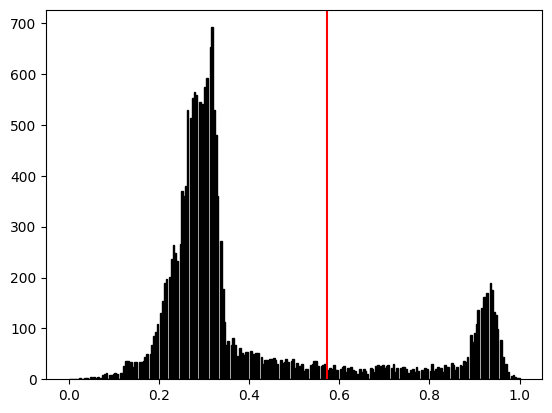

692 189


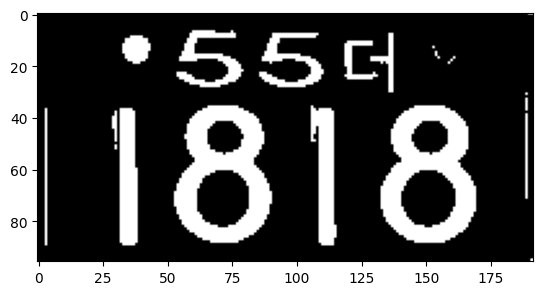

In [5]:
# using kmeans to cluster the image to 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# normalize the image via min-max normalization
im = (im - im.min()) / (im.max() - im.min())


# using otus method to get the threshold
from skimage.filters import threshold_otsu
thresh = threshold_otsu(im)
binary = im > thresh
# plt.imshow(binary, cmap='gray')
# plt.show()

# show threshold as histogram
plt.hist(im.ravel(), bins=256, range=(0, 1), fc='k', ec='k')
plt.axvline(thresh, color='r')
plt.show()

# get histogram value
hist, bins = np.histogram(im.ravel(), 256, [0, 1])

l_thresh = int(256 * thresh)
# max left and max right
l_max = np.max(hist[:l_thresh])
r_max = np.max(hist[l_thresh:])
print(l_max, r_max)

if l_max < r_max:
    binary = im < thresh

plt.imshow(binary, cmap='gray')
plt.show()

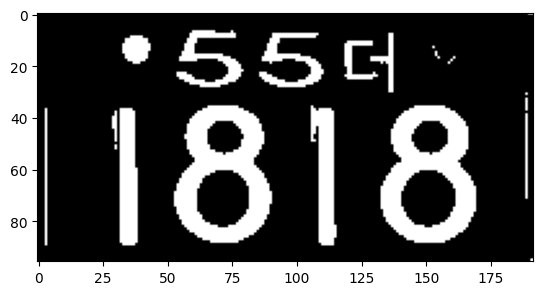

In [11]:
# using knn to classify the image to 2 classes (foreground and background)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# get the foreground and background
foreground = im[binary]
background = im[~binary]

# get the label
foreground_label = np.ones(foreground.shape[0])
background_label = np.zeros(background.shape[0])

# split the data




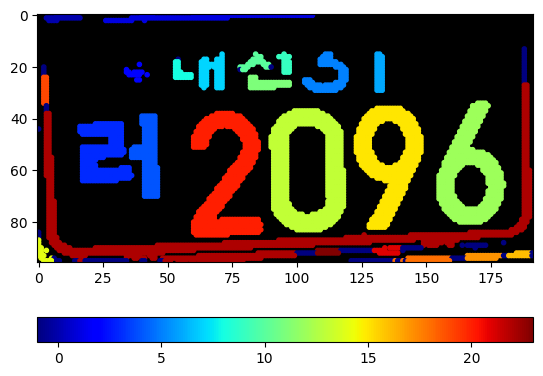

In [ ]:
# # gaussian blur
# from scipy.ndimage import gaussian_filter
# new_im = gaussian_filter(new_im, sigma=2)
# plt.imshow(new_im, cmap='gray')
# plt.show()

# image to 2d points
points = np.argwhere(binary > 0.5)

# using dbscan to cluster the points to clusters
from sklearn.cluster import *
# dbscan = DBSCAN(eps=2, min_samples=10)
dbscan = HDBSCAN(min_cluster_size=8)
dbscan.fit(points)
labels = dbscan.labels_
# get the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# transform the points to the original image
points = points[:, ::-1]
plt.imshow(np.ones(im.shape) * 255, cmap='gray')
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='jet', s=9)
# show color bar horizontally
plt.colorbar(orientation='horizontal')

plt.show()

C:\Users\noah\AppData\Local\Temp\ipykernel_9560\2898726249.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster[:, 0], cluster[:, 1], np.ones(len(cluster)) * i, c=colors[i], s=9)


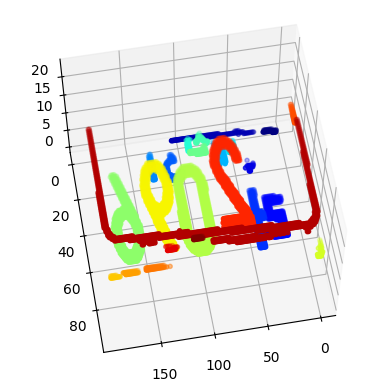

In [ ]:
# 3d plot via matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# get the color of each cluster
colors = plt.cm.jet(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    cluster = points[labels == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], np.ones(len(cluster)) * i, c=colors[i], s=9)

# view to 
ax.view_init(60, 80)
plt.show()

number of clusters: 24
sorted clusters: [(22, 892), (13, 684), (20, 556), (15, 537), (12, 530), (3, 291), (4, 200), (1, 102), (5, 94), (7, 76), (11, 48), (6, 44), (18, 36), (0, 27), (10, 27), (17, 26), (8, 25), (9, 23), (19, 22), (21, 19), (14, 18), (23, 18), (2, 16), (16, 15)]


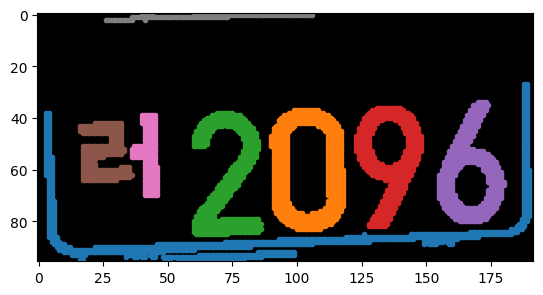

In [ ]:
# show the number of clusters
print('number of clusters:', n_clusters)

# sort the clusters by the area of the cluster
from collections import Counter
counter = Counter(labels)
# remove the noise cluster
del counter[-1]
# sort the clusters by the area of the cluster
sorted_clusters = sorted(counter.items(), key=lambda x: x[1], reverse=True)
print('sorted clusters:', sorted_clusters)

# clean the noise cluster
points = points[labels != -1]
labels = labels[labels != -1]

# # show the largest cluster via matplotlib
# largest_cluster = points[labels == sorted_clusters[0][0]]
# plt.imshow(np.ones(im.shape) * 255, cmap='gray')
# plt.scatter(largest_cluster[:, 0], largest_cluster[:, 1], s=9)
# plt.show()

# show the largest 8 clusters via matplotlib
plt.imshow(np.ones(im.shape) * 255, cmap='gray')
for i in range(8):
    cluster = points[labels == sorted_clusters[i][0]]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=9)
plt.show()
